Restauration des images
========

TP2 séance 2-3
========
--------
PEREIRA SOUZA DIAS

SHEN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

 1) Développer un code qui permet d'appliquer un flou de bougé de l'image "lena.png" en fonction de la vitesse du bougé, de sa durée et de son orientation.

In [11]:
def flou(image, vitesse, duree, orientation):
    #Afficher image d'input
    plt.figure(2,figsize=(11,11))
    img = cv2.imread(image,0)
    plt.subplot(121)
    plt.imshow(img,cmap='gray')
    plt.title('Image Input'), plt.xticks([]), plt.yticks([])
    
    
    #Prend le taille de l'image
    (x, y) = img.shape
    X=np.arange(-x/2,x/2,1)/x          #on centree le grid dans le x axis
    Y=np.arange(-y/2,y/2,1)/y          #on centree le grid dans le y axis
    u,v = np.meshgrid(X,Y)
    
    #Definition du filtre de flou de bougé
    L=vitesse*duree; 
    h = np.sinc(L*(u*np.cos(orientation)+v*np.sin(orientation)))
    
    #on travaille dans le domaine frequentielle
    f=np.fft.fft2(img)
    fshift=np.fft.fftshift(f)          #pour centrer le spectre de l'image
    
    #Image filtre après flou de Bougé
    f_imagefiltre=fshift*h  
    
    imagefiltre=np.abs(np.fft.ifft2(f_imagefiltre))
    plt.subplot(122)
    plt.imshow(imagefiltre,cmap='gray')
    plt.title('Image après Flou de Bougé'), plt.xticks([]), plt.yticks([])
    plt.show()

In [ ]:
def flou(image, vitesse, duree, orientation):
    #Afficher image d'input
    plt.figure(2,figsize=(11,11))
    img = cv2.imread(image,0)
    plt.subplot(121)
    plt.imshow(img,cmap='gray')
    plt.title('Image Input'), plt.xticks([]), plt.yticks([])
    
    
    #Prend le taille de l'image
    (x, y) = img.shape
    X=np.arange(-x/2,x/2,1)/x          #on centree le grid dans le x axis
    Y=np.arange(-y/2,y/2,1)/y          #on centree le grid dans le y axis
    u,v = np.meshgrid(X,Y)
    
    #Definition du filtre de flou de bougé
    L=vitesse*duree; 
    h = np.sinc(L*(u*np.cos(orientation)+v*np.sin(orientation)))
    
    #on travaille dans le domaine frequentielle
    f=np.fft.fft2(img)
    fshift=np.fft.fftshift(f)          #pour centrer le spectre de l'image
    
    #Image filtre après flou de Bougé
    f_imagefiltre=fshift*h  
    
    imagefiltre=np.abs(np.fft.ifft2(f_imagefiltre))
    plt.subplot(122)
    plt.imshow(imagefiltre,cmap='gray')
    plt.title('Image après Flou de Bougé'), plt.xticks([]), plt.yticks([])
    plt.show() 

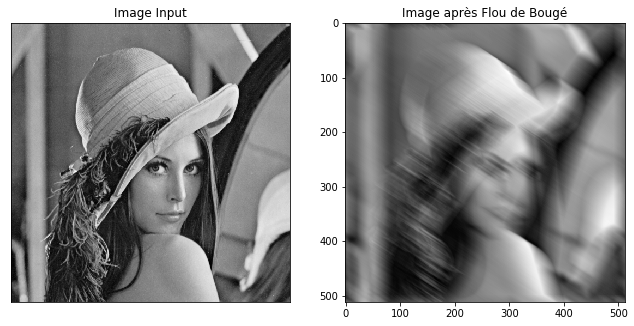

In [10]:
image='lena.png'
flou(image,5,10,10)

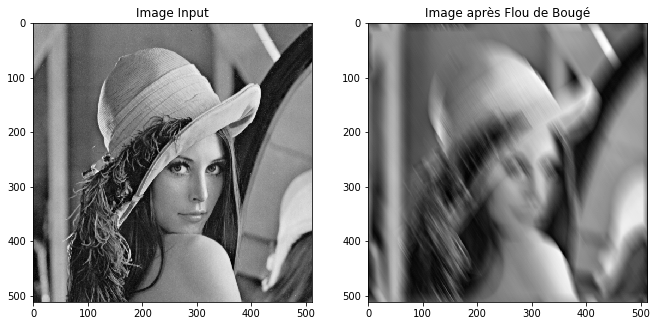

In [8]:
image='lena.png'
flou(image,4,10,45)

EXPLICATION:

mention how the speed, angle and time changes the image.
Smudge line direction that appears in the image depends on the angle given

2) Proposer et programmer une méthode simple pour éliminer le flou de bougé
connu (tous les paramètres du flou sont connus).

In [12]:
def corrflou(image, vitesse, duree, orientation):
    
    plt.figure(2,figsize=(11,11))
    img = cv2.imread(image,0)
    #Prend le taille de l'image
    (x, y) = img.shape
    X=np.arange(-x/2,x/2,1)/x          #on centree le grid dans le x axis
    Y=np.arange(-y/2,y/2,1)/y          #on centree le grid dans le y axis
    u,v = np.meshgrid(X,Y)
    
    L=vitesse*duree; 
    h = np.sinc(L*(u*np.cos(orientation)+v*np.sin(orientation)))
    
    #on travaille dans le domaine frequentielle
    f=np.fft.fft2(img)
    fshift=np.fft.fftshift(f)          #pour centrer le spectre de l'image
    
    #Image filtre après flou de Bougé
    f_imagebougee=fshift*h  
    
    imagefiltre=np.abs(np.fft.ifft2(f_imagebougee))
    plt.imshow(imagefiltre,cmap='gray')
    plt.title('Image après Flou de Bougé'), plt.xticks([]), plt.yticks([])
    plt.show() 
    
    
    g = 1/h                                                           # formule du bougé
    spectre_img_filtree = g * fshift                               #application du flou
    img_filtree = np.fft.ifft2(spectre_img_filtree)                        #transformation en spatial
    plt.figure(3,figsize=(10,10)), plt.imshow(np.abs(img_filtree), cmap='gray')
    plt.title('Image floutée-filtrée')
    plt.show()



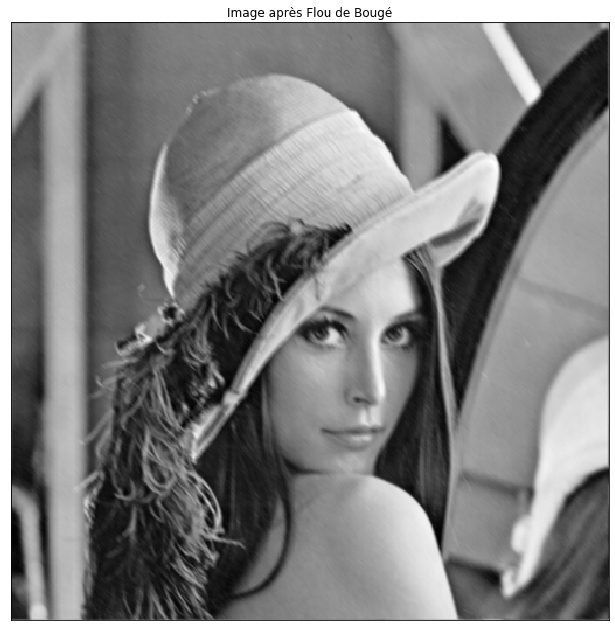

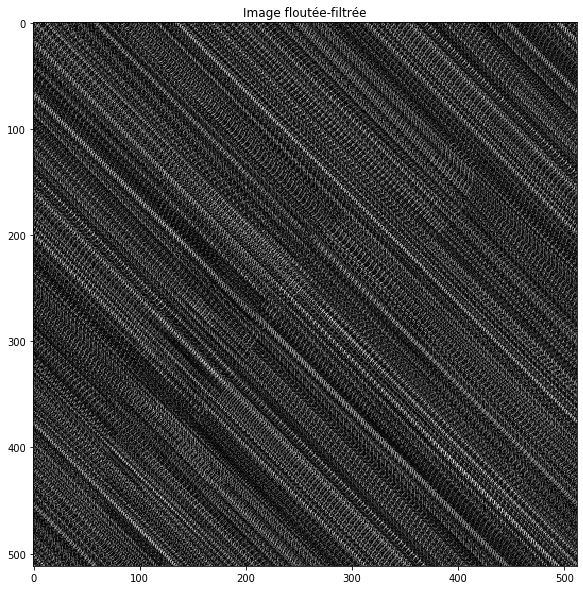

In [15]:
image='lena.png'
corrflou(image,5,1,np.pi/4)

3)Cette méthode fonctionne-t-elle toujours efficacement? Évaluer l'efficacité de la méthode proposée en fonction des paramètres du flou.

4)Ajouter un bruit blanc à l'image avec le flou (typiquement un bruit Gaussien
de moyenne nulle et de variance connue). La méthode proposée est-elle
robuste au bruit ?


5)Proposer une amélioration pour prendre en compte la présence du bruit.

6) En vous appuyant sur un formalisme mathématique soigné (et sur un
exercice de la séance 1), proposer une méthode simple pour estimer la
longueur L du bougé lorsque l'image avant le flou de bougé est inconnue. Les
autres paramètres du flou de bougé sont supposés connus.

7) Programmer la méthode d'estimation de la longueur L du flou de bougé.
Évaluer l'efficacité de cette méthode d'estimation (présence de bruit, valeur de
L, etc.).